# **IMPORTADO DE MÓDULOS/FUNCIONES**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
from functions import normalize_by_max, simpsons_rule_array

# **LOAD PULSES**

In [3]:
#Nev_Co60 = 200000  #Nùmero de eventos en las prácticas del máster
#Nev_Na22 = 150000
#Nt = 600
#Nc = 2



#pulsos_Co60 = np.zeros((Nev_Co60,Nt,Nc))
#
#with open('/home/josea/PracticaTimingDigital/pulsoCo60', 'rb') as file:
#  for i in range(Nev_Co60):
#    for j in range(Nt):
#      try:
#        pulsos_Co60[i,j, :] = np.fromfile(file, dtype = np.float32, count = 2)
#      except EOFError:
#        break
#
#    a1, a2 = np.fromfile(file, dtype=np.float32, count=2)

In [4]:
#np.savez_compressed('/home/josea/PracticaTimingDigital/pulsoCo60', data = pulsos_Co60)

In [5]:
#data = np.load('/home/josea/PracticaTimingDigital/pulsoCo60.npz')
#data = data['data']

#data = np.load('/home/josea/PracticaTimingDigital/pulsoNa22.npz')
#data = data['data']

In [6]:
#data = np.fromfile('/home/josea/coin-pulses-Na-11-0.dat', dtype = 'float32')
#Nt2 = 931
#Nev = 200000
#Nc = 4
#data = data[0:Nt2*Nev*Nc].reshape((Nev,Nt2,Nc))
#data = data[:,:,:2]

In [7]:
data = np.fromfile('/home/josea/na-8cm-2cm.dat', dtype = 'float32')
print(data.shape)
Nt2 = 600
Nev = 50000
Nc = 2
data = data[0:Nt2*Nev*Nc].reshape((Nev,Nt2,Nc))
print(data.shape)

(120000000,)
(50000, 600, 2)


# **CALIBRATE**

In [8]:
# Calculate energies
energy_dec0 = simpsons_rule_array(data[:,:,0],1) 
energy_dec1 = simpsons_rule_array(data[:,:,1],1)

In [9]:
# Photopeak energies
gamma_energy = 511

# Calculate Calibration factors
histogE, binsE = np.histogram(energy_dec0, bins = 500, range = [0,200]);
index_gamma_dec0 = find_peaks(histogE, height = 1000)[0][-1]
pos_gamma_dec0 = (binsE[index_gamma_dec0 + 1] + binsE[index_gamma_dec0])/2
m_dec0 = gamma_energy/pos_gamma_dec0
calibrado_dec0 = m_dec0*energy_dec0   # Linear calibration


histogE, binsE = np.histogram(energy_dec1, bins = 500, range = [0,200]);
index_gamma_dec1 = find_peaks(histogE, height = 1000)[0][-1]
pos_gamma_dec1 = (binsE[index_gamma_dec1 + 1] + binsE[index_gamma_dec1])/2
m_dec1 = gamma_energy/pos_gamma_dec1
calibrado_dec1 = m_dec1*energy_dec1

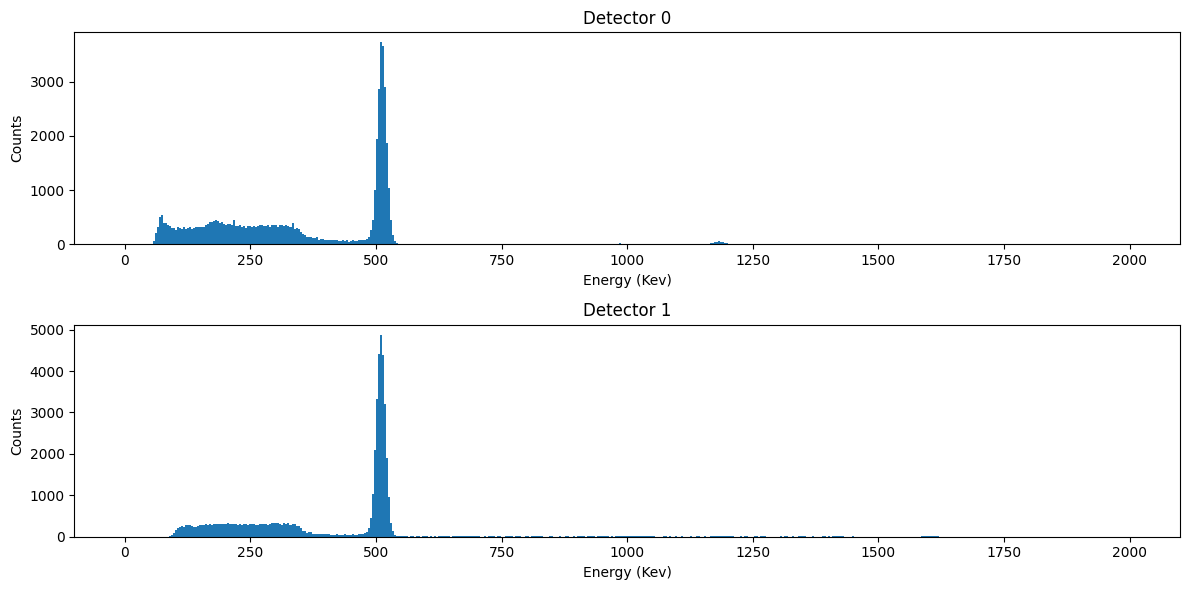

In [10]:
# Plot spectra
plt.figure(figsize = (12,6))
plt.subplot(211)
plt.hist(calibrado_dec0, bins = 500, range = [0,2000]);
plt.xlabel('Energy (Kev)')
plt.ylabel('Counts')
plt.title('Detector 0')

plt.subplot(212)
plt.hist(calibrado_dec1, bins = 500, range = [0,2000]);
plt.xlabel('Energy (Kev)')
plt.ylabel('Counts')
plt.title('Detector 1')

plt.tight_layout() #Prevent titles from superposing

# **ENERGY FILTERING**

In [11]:
# Define energy gates
gate_min_dec0 = 490
gate_max_dec0 = 530
gate_min_dec1 = 490
gate_max_dec1 = 530

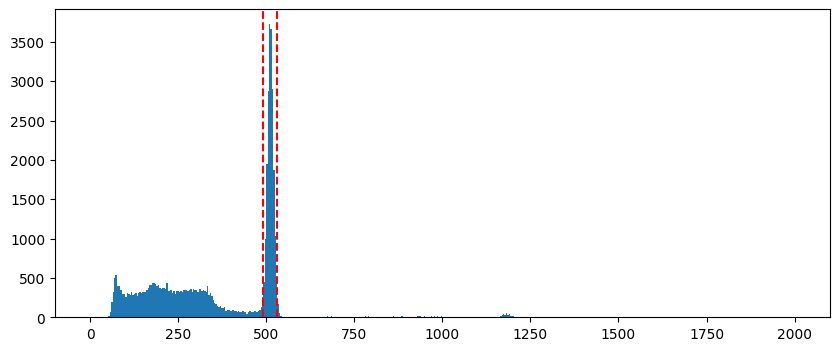

In [12]:
plt.figure(figsize = (10,4))
plt.hist(calibrado_dec0, bins = 500, range = [0,2000]);
plt.axvline(x = gate_min_dec0, color = 'r', linestyle = '--')
plt.axvline(x = gate_max_dec0, color = 'r', linestyle = '--')

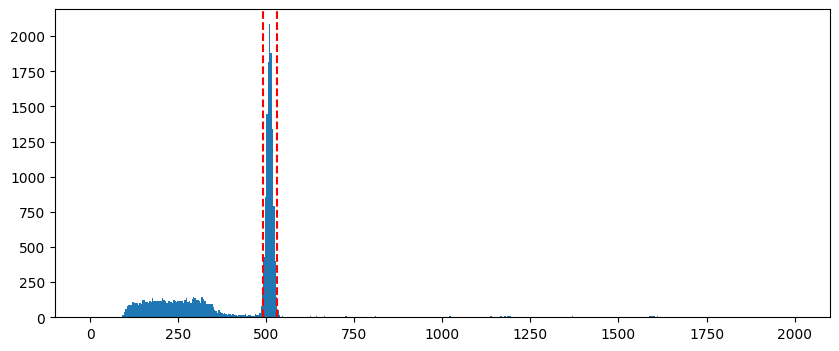

In [13]:
calibrado_dec1_filt = calibrado_dec1[(calibrado_dec0 > gate_min_dec0)  & (calibrado_dec0 < gate_max_dec0)]

plt.figure(figsize = (10,4))
plt.hist(calibrado_dec1_filt, bins = 500, range = [0,2000])
plt.axvline(x = gate_min_dec1, color = 'r', linestyle = '--')
plt.axvline(x = gate_max_dec1, color = 'r', linestyle = '--')

# **NORMALIZE**

In [14]:
data_filt = data[(calibrado_dec0 > gate_min_dec0)  & (calibrado_dec0 < gate_max_dec0),:,:]
data_filt = data_filt[(calibrado_dec1_filt  > gate_min_dec1)  & (calibrado_dec1_filt < gate_max_dec1),:,:]

print(data_filt.shape)
#------------------------------------------------------- Normalizar Pulsos ------------------------------------------------------------------------------------
data_filt_norm = normalize_by_max(data_filt, fit_polynomial = True)

(11262, 600, 2)


# **CHECK FOR OUTLIERS**

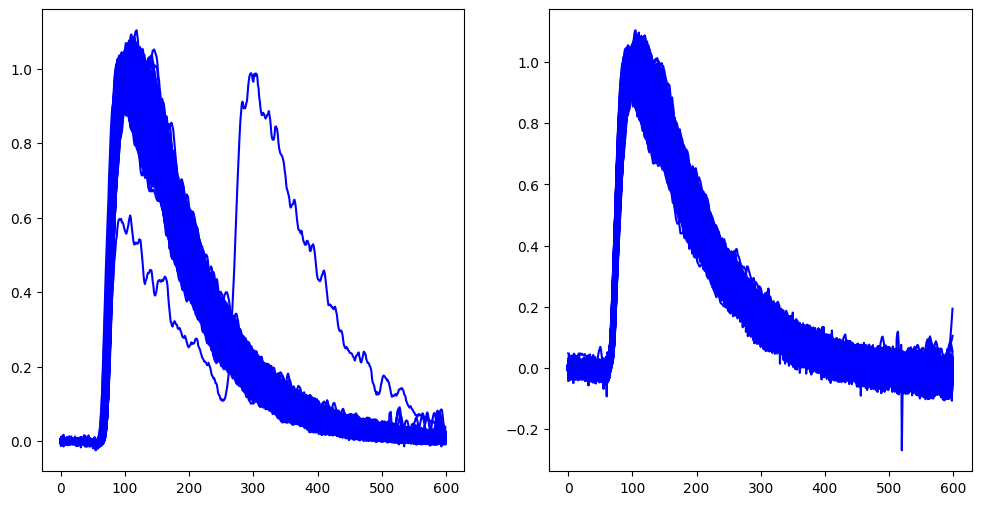

In [15]:
# Con el plot se ve si hay algún pulso que empiece mal/que no cuadre con el otro detector
plt.figure(figsize = (12,6))
for i in range(data_filt_norm.shape[0]):
  plt.subplot(121)
  plt.plot(data_filt_norm[i,:,0], 'b-')
  plt.subplot(122)
  plt.plot(data_filt_norm[i,:,1], 'b-')

In [17]:
#np.savez_compressed('/home/josea/DEEP_TIMING/DEEP_TIMING_VS/Na22_filtered_data/Na22_82_norm_ALBA.npz', data = data_filt_norm)